**Levan Sanadiradze**

**RedID: 821 008 884**

**Artificial Inteligence (CS550)**

Title: **Homework №2**
<br>
Deadline: **6 May 2020**

Homework will be evaluated maximum by **6 points**.
Each problem is **one point**. 

<h3 align="center">Problem 1: Probability Distributions</h3>

Consider the following probability distributions (choose the number that corresponds to your number in the student's list):
0. uniform
1. bernoulli distribution
2. binomial distribution
3. geometric distribution
4. hypergeometric distribution
5. poisson
6. beta
7. gamma
8. students
9. chi_squared
11. Gaussian distribution

Perform the following tasks:
- define the **distribution function**
- choose the **definition area** of the distribution function
- **generate 1000 events** with chosen distribution function
- add **Gaussian noise**
- choose the **binning** and plot the **histogramm **(do not forget to normalize it)
- **fit** the resulting histogram with the true distribution function, **identify errors**
- make a **final graph** showing: the resulting histogram, the true distribution and the results of fitting with the identified errors

**Note**: In the case of **discrete** and **continuouse** distributions, **do both**!

**Note**: Do not forget to **include** the **labels and units**!

**Hint**: You can use this source:

https://www.boost.org/doc/libs/1_58_0/libs/math/doc/html/math_toolkit/dist_ref/dists/

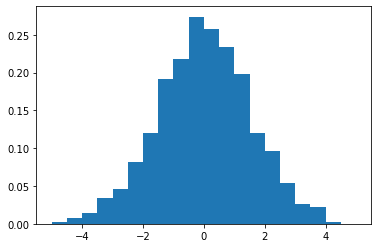

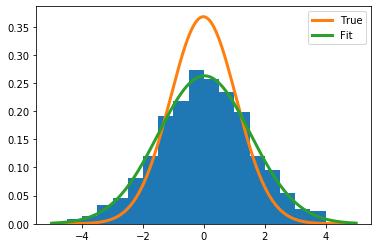

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


dof = 9
raw = np.random.standard_t(dof, [1000])
noise = np.random.normal(0, 1.0, size = [1000])
lnspc = np.linspace(-5, 5, 1000)

data = raw + noise

# plt.hist(raw, bins = 100, range=[-5, 5], density = True)
# plt.show()

hist = plt.hist(data, bins = 20, range=[-5, 5], density = True)
plt.show()

hist = plt.hist(data, bins = 20, range=[-5, 5], density = True)


p = stats.t.fit(raw, dof)
pdf_g = stats.t.pdf(lnspc, p[0], p[1], p[2])
plt.plot(lnspc, pdf_g, linewidth = 3, label='True') 

p_noised = stats.t.fit(data, dof)
pdf_g_noised = stats.t.pdf(lnspc, p_noised[0], p_noised[1], p_noised[2])
plt.plot(lnspc, pdf_g_noised, linewidth = 3, label='Fit') 
plt.legend()
plt.show()

<h3 align="center">Problem 2: Bias of an Estimator</h3>

Suppose $X_1, X_2, ..., X_n$ are **independent and identically distributed** (**i.i.d.**) random variables with 
**expectation** $\mu$ and **variance** $\sigma^2$.

The **sample mean** and **uncorrected sample variance** are defined as:

$$\overline{X} = \frac{1}{n}\sum_{i=1}^{n} X_i \text{ and } S^2 = \frac{1}{n}\sum_{i=1}^{n} \left ( X_i - \overline{X} \right )^2.$$

(a) Compute the **sample mean** and compare it with the **population mean** $\mu$.

(b) Compute the **expected value** of the **uncorrected sample variance**, $\mathbf{E}[S^2]$, and compare it with the **population variance** $\sigma^2$.

(c) How to **change** the **sample variance** to get **unbiased estimator** of the **population variance** $\sigma^2$.

**Note**: the **expectation value** and the **sample mean** are different things!


**(a)**
$$
E(\frac{1}{n}\sum_{i=1}^{n} X_i) = \frac{1}{n}\sum_{i=1}^{n} E(X_i) = \frac{1}{n}\sum_{i=1}^{n} \mu = \frac{1}{n} n \mu = \mu
$$
$$
\overline{X} = \mu
$$

**(b)**
$$
E(S^2) = E[\frac{1}{n}\sum_{i=1}^{n} ( X_i - \overline{X} )^2] = \frac{1}{n} E[\sum_{i=1}^{n} ( X_i - \overline{X} )^2] \text{   (1)}
$$
$$
E[\sum_{i=1}^{n} ( X_i - \overline{X} )^2] = 
E[\sum_{i=1}^{n} (X_i^2 - 2X_i\overline{X} + \overline{X}^2)] = 
E[\sum_{i=1}^{n} X_i^2 - \sum_{i=1}^{n} 2X_i\overline{X} + \sum_{i=1}^{n}\overline{X}^2] = 
E[\sum_{i=1}^{n} X_i^2 - 2\overline{X}\sum_{i=1}^{n} X_i + n\overline{X}^2] =
E[\sum_{i=1}^{n} X_i^2 - 2\overline{X}n\overline{X} + n\overline{X}^2] =
E[\sum_{i=1}^{n} X_i^2 - 2n\overline{X}^2 + n\overline{X}^2] =
E[\sum_{i=1}^{n} X_i^2 - n\overline{X}^2] =
\sum_{i=1}^{n} E[X_i^2] - E[n\overline{X}^2] =
\sum_{i=1}^{n} E[X_i^2] - n E[\overline{X}^2] \text{  (2)}
$$

Now let's use these two formulas:
$$
E[X_i^2] = \sigma^2 + \mu^2
$$
$$
E[\overline{X}^2] = \frac{\sigma^2}{n} + \mu^2
$$
Substitute them into the **(2)**:

$$
E[\sum_{i=1}^{n} ( X_i - \overline{X} )^2] = 
\sum_{i=1}^{n} E[X_i^2] - n E[\overline{X}^2] = 
\sum_{i=1}^{n} (\sigma^2 + \mu^2) - n (\frac{\sigma^2}{n} + \mu^2) = n\sigma^2 + n\mu^2 - \sigma^2 - n\mu^2 = n \sigma^2 - \sigma^2 = (n - 1)\sigma^2
$$

and substitue this into **(1)**:
$$
E(S^2) = \frac{1}{n} E[\sum_{i=1}^{n} ( X_i - \overline{X} )^2] = \frac{1}{n} (n - 1)\sigma^2 = \frac{n - 1}{n}\sigma^2 
$$

We can conclude from the result that the **uncorrected sample variance** is biased and underestimates the population variance $\sigma^2$

**(c)**
<br>
divide on $n - 1$ instead of dividing by $n$:
$$
S^2 = \frac{1}{n - 1}\sum_{i=1}^{n} \left ( X_i - \overline{X} \right )^2
$$
This would give unbiased estimate of $\sigma^2$ as:
$$
E(S^2) = \frac{1}{n - 1} E[\sum_{i=1}^{n} ( X_i - \overline{X} )^2] = \frac{1}{n - 1} (n - 1)\sigma^2 = \sigma^2 
$$

<h3 align="center">Problem 3: Correlation Table</h3>

Given a **correlation table** of a random vector $(X,Y)$:

| X\Y |  -6  |  0  |   3  |
|:---:|:----:|:---:|:----:|
|  -2 |  0.1 |  0  |  0.2 |
|  0  | 0.05 |  a  |   0  |
|  1  |   0  | 0.2 | 0.05 |
|  7  |  0.1 |  0  |  0.1 |


(a) Find the **value** of the missing entry $a$;

(b) Find the **distribution** of a random variable $X$, i.e. $\operatorname{P}(X = x_i)$;

(c) Find the **expectation** and **variance** of a random variable $X$, i.e. $\operatorname{E}[X]$ and $\operatorname{Var}[X]$;

(d) Find the **distribution** of a random variable $Y$, i.e. $\operatorname{P}(Y = y_i)$;

(e) Find the **expectation** and **variance** of a random variable $Y$, i.e. $\operatorname{E}[Y]$ and $\operatorname{Var}[Y]$;

(f) Find the **covariance** of the random variables $X$ and $Y$, i.e. $\operatorname{Cov}(X, Y)$;

(g) Find the **сorrelation сoefficient** of the random variables $X$ and $Y$, i.e. $\rho(X, Y)$.

**(a)**

Sum of all entries = $ 0.1 + 0 + 0.2 + 0.05 + a + 0 + 0 + 0.2 + 0.05 + 0.1 + 0 + 0.1 = 1$

$0.8 + a = 1$, thus $a = 0.2$

**(b)**

$P(X = -2) = 0.1 + 0 + 0.2 = 0.3$

$P(X = 0) = 0.05 + 0.2 + 0 = 0.25$

$P(X = 1) = 0 + 0.2 + 0.05 = 0.25$

$P(X = 7) = 0.1 + 0 + 0.1 = 0.2$

**(c)**

$E[X] = -2 \cdot 0.3 + 0 \cdot 0.25 + 1 \cdot 0.25 + 7 \cdot 0.2 = 1.05$

$E[X^2] = -2^2 \cdot 0.3 + 0^2 \cdot 0.25 + 1^2 \cdot 0.25 + 7^2 \cdot 0.2 = 4 \cdot 0.3 + 1 \cdot 0.25 + 49 \cdot 0.2 = 11.25$

$Var[X] = E[X^2] - E[X]^2 = 11.25 - 1.05^2 = 11.25 - 1.1025 = 10.1475$

**(d)**

$P(Y = -6) = 0.1 + 0.05 + 0 + 0.1 = 0.25$

$P(Y = 0) = 0 + 0.2 + 0.2 + 0 = 0.4$

$P(Y = 3) = 0.2 + 0 + 0.05 + 0.1 = 0.35$

**(e)**

$E[Y] = -6 \cdot 0.25 + 0 \cdot 0.4 + 3 \cdot 0.35 = -0.45$

$E[Y^2] = 36 \cdot 0.25 + 0 \cdot 0.4 + 9 \cdot 0.35 = 12.15$

$Var[Y] = 12.15 - (-0.45)^2 = 11.9475$

**(f)**

$
E[XY] = 
(-2) \cdot (-6) \cdot 0.1 + (-2) \cdot 0 \cdot 0 + (-2) \cdot 3 \cdot 0.2 +
0 \cdot (-6) \cdot 0.5 + 0 \cdot 0 \cdot 0.2 + 0 \cdot 3 \cdot 0 +
1 \cdot (-6) \cdot 0 + 1 \cdot 0 \cdot 0.2 + 1 \cdot 3 \cdot 0.05 +
7 \cdot -6 \cdot 0.1 + 7 \cdot 0 \cdot 0 + 7 \cdot 3 \cdot 0.1 
=
(-2) \cdot (-6) \cdot 0.1 + (-2) \cdot 3 \cdot 0.2 + 1 \cdot 3 \cdot 0.05 +7 \cdot -6 \cdot 0.1 + 7 \cdot 3 \cdot 0.1 
= 
-1.95
$

$Cov(X, Y) = E[XY] - E[X]E[Y] = -1.95 - 1.05 \cdot (-0.45) = -1.4775$

**(g)**

$
\rho(X, Y) = \frac {Cov(X, Y)} { \sqrt { Var[X] \cdot Var[Y] }} 
= 
\frac { -1.4775 } { \sqrt { 10.1475 \cdot 11.9475 }}
= 
\frac { -1.4775 } { \sqrt { 10.1475 \cdot 11.9475 }} 
=
\frac { -1.4775 } { 11.01078 }
=
-0.13419
$

<h3 align="center">Problem 4: Naive Bayes Algorithm</h3>

Lets consider a dataset of a Car Showroom:

| Car № |        Maker        |  Type  | Color | Sell |
|:-----:|:-------------------:|:------:|:-----:|:----:|
|   1   | TATA Motors Limited | Sports |  Red  |  Yes |
|   2   |  FORD Motor Company | Sports | Black |  Yes |
|   3   | TATA Motors Limited |   Suv  |  Red  |  No  |
|   4   |  FORD Motor Company |   Suv  |  Red  |  No  |
|   5   | TATA Motors Limited | Sports | Black |  Yes |
|   6   |  FORD Motor Company | Sports | Black |  No  |
|   7   | TATA Motors Limited |   Suv  |  Red  |  No  |
|   8   | TATA Motors Limited |   Suv  |  Red  |  Yes |
|   9   |  FORD Motor Company |   Suv  | Black |  No  |
|   10  |  FORD Motor Company |   Suv  | Black |  Yes |

1. Suppose that we have a **black sports** car manufactured by **TATA Motors**, what is the probability of selling it?

2. Write a Python code that receives the **car parameter as input** and gives the **probability of selling the car as output**.

| Maker | Sell = Yes | Sell = No | P(Sell = Yes) | P(Sell = No) |
|:-----:|:----:|:----:|:----:|:----:|
| TATA  | 3 | 2 | $\frac{3}{5}$ | $\frac{2}{5}$ |
| FORD  | 2 | 3 | $\frac{2}{5}$ | $\frac{3}{5}$ |
| **TOTAL**  | 5 | 5 | 1 | 1 |

| Type | Sell = Yes | Sell = No | P(Sell = Yes) | P(Sell = No) |
|:-----:|:----:|:----:|:----:|:----:|
| Sports  | 3 | 1 | $\frac{3}{5}$ | $\frac{1}{5}$ |
| Suv  | 2 | 4 | $\frac{2}{5}$ | $\frac{4}{5}$ |
| **TOTAL**  | 5 | 5 | 1 | 1 |

| Color | Sell = Yes | Sell = No | P(Sell = Yes) | P(Sell = No) |
|:-----:|:----:|:----:|:----:|:----:|
| Red  | 2 | 3 | $\frac{2}{5}$ | $\frac{3}{5}$ |
| Black  | 3 | 2 | $\frac{3}{5}$ | $\frac{2}{5}$ |
| **TOTAL**  | 5 | 5 | 1 | 1 |

| Sell | Count | P |
|:-----:|:----:|:----:|
| Yes  | 5 | $\frac{1}{2}$ |
| No  | 5 | $\frac{1}{2}$ | 
| **TOTAL**  | 10 | 1 |

**1.**

$\{A\}: \{ Sell = Yes \}$

$\{B_1\}: \{ Maker = TATA \}$

$\{B_2\}: \{ Type = Sports \}$

$\{B_3\}: \{ Color = Black \}$

$$
P(A|B) = \frac {P(B_1|A) P(B_2|A) P(B_3|A) P(A)} {P(B_1|A) P(B_2|A) P(B_3|A) P(A) + P(B_1|\overline{A}) P(B_2|\overline{A}) P(B_3|\overline{A}) P(\overline{A})} =
\frac {\frac{3}{5} \frac{3}{5} \frac{3}{5} \frac{1}{2}} {\frac{3}{5} \frac{3}{5} \frac{3}{5} \frac{1}{2} + \frac{2}{5} \frac{1}{5} \frac{2}{5} \frac{1}{2}} =
\frac {\frac{27}{250}} {\frac{27}{250} + \frac{2}{125}} = \frac{27}{31}
$$

**2.**

In [25]:
import pandas as pd

data = [['TATA', 'Sports', 'Red',   'Yes'], \
        ['FORD', 'Sports', 'Black', 'Yes'], \
        ['TATA', 'Suv',    'Red',   'No' ], \
        ['FORD', 'Suv',    'Red',   'No' ], \
        ['TATA', 'Sports', 'Black', 'Yes'], \
        ['FORD', 'Sports', 'Black', 'No' ], \
        ['TATA', 'Suv',    'Red',   'No' ], \
        ['TATA', 'Suv',    'Red',   'Yes'], \
        ['FORD', 'Suv',    'Black', 'No' ], \
        ['FORD', 'Suv',    'Black', 'Yes']]

df = pd.DataFrame(data, columns = ['Maker', 'Type', 'Color', 'Sell'])

df[(df['Type'] == 'Sports') & (df['Sell'] == 'Yes')]

def _getCounts(DF, column = None, value = None):
    if value is None:
        column = None
    c1 = len(DF[(DF[column] == value if column is not None else True) & (DF['Sell'] == 'Yes')].index)
    c2 = len(DF[(DF[column] == value if column is not None else True) & (DF['Sell'] == 'No')].index)
    
    return c1, c2


def getProbability(DF, Maker = None, Type = None, Color = None):
    Count = len(DF.index)
    YesCount = len(DF[DF['Sell'] == 'Yes'].index)
    NoCount = Count - YesCount
    
    Numerator = 1
    Denominator = 1
    
    if Maker is not None:
        c1, c2 = _getCounts(DF, 'Maker', Maker)
        Numerator *= c1 / YesCount
        Denominator *= c2 / NoCount
        del c1, c2
        
    if Type is not None:
        c1, c2 = _getCounts(DF, 'Type', Type)
        Numerator *= c1 / YesCount
        Denominator *= c2 / NoCount
        del c1, c2
        
    if Color is not None:
        c1, c2 = _getCounts(DF, 'Color', Color)
        Numerator *= c1 / YesCount
        Denominator *= c2 / NoCount
        del c1, c2
        
    yc, nc = _getCounts(DF)
    Numerator *= yc
    Denominator *= nc
    Denominator += Numerator
    
    return Numerator / Denominator
    
    
getProbability(df, 'TATA', 'Sports', 'Black')

0.8709677419354838

<h3 align="center">Problem 5: Gradient Descent Method</h3>

Given a function of two variables: 
$$f(x,y) = x^2 + 2y^2 + e^{x+y}.$$

Find the minimum of this function using the gradient descent method.
For initial data, take the following conditions:
- starting point: $(0,0)$;
- step size multiplier: $0.1$;
- precision (absolute value of gradient): $0.05$.

How many iterations are necessary to obtain the required precision? (write python code).

In [39]:
import numpy as np

def f(x, y):
    return (x ** 2) + 2 *(y ** 2) + np.exp(x + y)

def df_dx(x, y):
    return 2 * x + np.exp(x + y)

def df_dy(x, y):
    return 4 * y + np.exp(x + y)

def magn(x, y):
    return np.sqrt(x ** 2 + y ** 2)

def step(x, y, ssm):
    dx = df_dx(x, y)
    dy = df_dy(x, y)
    
    x -= ssm * dx
    y -= ssm * dy
    
    
    return x, y, f(x, y), magn(dx, dy)

def findMinima(x, y, ssm, targP):
    p = targP + 100
    i = 0
    
    while p > targP:
        x, y, v, p = step(x, y, ssm)
        i += 1
        
    return i, x, y, v, p
        
i, x, y, v, p = findMinima(0, 0, 0.1, 0.05)

print(i, "iterations.")

10 iterations.


<h3 align="center">Problem 6: Automatic Differentiation</h3>

Consider the function: $$z(x, y) = \sin{\left( x^2y + xy^2\right )}.$$

1. Build a **computation grap** and calculate the values for each node, propagating from the bottom (the input variables) to the top (the output function) at point $A = (1, 1)$.

2. Consider the seed values $\dot{w}_1 = \frac{\partial w_1}{\partial x} = 1$ and $\dot{w}_2 = \frac{\partial w_2}{\partial x} = 1$, and calculate the partial derivatives of each connection between operations, represented by the edges, i.e. $\dot{w}_i = \frac{\partial w_i}{\partial x}$.

3. Calculate the partial derivative $\frac{\partial z}{\partial x}$ at point $A = (1, 1)$ using the **forward accumulation**.

4. Consider the seed values $\bar{w}_n = \frac{\partial z}{\partial w_n} = 1$ and calculate the subexpresion varibales $\bar{w}_i$ for each connection between operations, i.e. $\bar{w}_i = \frac{\partial z}{\partial w_i}$.

5. Calculate the partial derivative $\frac{\partial z}{\partial y}$ at point $A = (1, 1)$ using the **reverse accumulation**.

**1.**

<img src="Graph.png"/> 

$$
N_1 = 1; N_2 = 1;
$$
$$
N_3 = N_1^2 = 1; N_4 = N_2 ^ 2 = 1
$$
$$
N_5 = N_3 \cdot N_2 = 1; N_6 = N_1 \cdot N_4 = 1
$$
$$
N_7 = N_5 + N_6 = 2; N_8 = sin(N_7) = sin(2)
$$

**2.**

$$
E_1 = \frac {\partial N_3} {\partial N_1} \cdot 1 = \frac {\partial N_1^2} {\partial N_1} \cdot 1 = 2N_1
$$
$$
E_2 = \frac {\partial N_6} {\partial N_1} \cdot 0 = \frac {\partial N_1 \cdot N_4} {\partial N_1} \cdot 0 = 0
$$
$$
E_3 = \frac {\partial N_5} {\partial N_2} \cdot 1 = \frac {\partial N_3 \cdot N_2} {\partial N_2} \cdot 1 = N_3 \cdot 1 = N_1^2
$$
$$
E_4 = \frac {\partial N_4} {\partial N_2} \cdot 0 = \frac {\partial N_2^2} {\partial N_2} \cdot 0 = 0
$$
$$
E_5 = \frac {\partial N_5} {\partial N_3} \cdot E_1 = \frac{\partial N_3\cdot N_2}{\partial N_3} \cdot E_1 = 0
$$
$$
E_6 = \frac {\partial N_6} {\partial N_4} \cdot E_2 = \frac{\partial N_1\cdot N_4}{\partial N_4} \cdot E_2 = 0
$$
$$
E_7 = \frac {\partial N_7} {\partial N_5} \cdot (E_5 + E_3) = \frac {\partial N_5 + N_6} {\partial N_5} \cdot (E_5 + E_3) = 2N_1 + N_1^2
$$
$$
E_8 = \frac {\partial N_7} {\partial N_6} \cdot (E_6 + E_2) = \frac {\partial N_5 + N_6} {\partial N_6} \cdot (E_6 + E_2) = 0
$$
$$
E_9 = \frac {\partial N_8} {\partial N_7} \cdot (E_7 + E_6) = \frac {\partial sin(N_7)} {\partial N_7} \cdot (E_7 + E_6) = cos(N_7) \cdot (2N_1 + N_1^2)
$$

**3.**

$$
\frac {\partial z} {\partial x} = 
E_9 =
cos(2) \cdot (2 + 1) = 3cos(2)
$$

**4.**

$$
E_9 = \frac {\partial N_8} {\partial N_7} \cdot 1 = cos(N_7)
$$
$$
E_8 = \frac {\partial N_7} {\partial N_6} \cdot E_9 = 1 \cdot E_9 = cos(N_7)
$$
$$
E_7 = \frac {\partial N_7} {\partial N_5} \cdot E_9 = 1 \cdot E_9 = cos(N_7)
$$
$$
E_6 = \frac {\partial N_6} {\partial N_4} \cdot E_8 = N_1 \cdot cos(N_7)
$$
$$
E_5 = \frac {\partial N_5} {\partial N_3} \cdot E_7 = N_2 \cdot cos(N_7)
$$
$$
E_4 = \frac {\partial N_4} {\partial N_2} \cdot E_6 = 2N_2 \cdot N_1 \cdot cos(N_7)
$$
$$
E_3 = \frac {\partial N_5} {\partial N_2} \cdot E_7 = N_1^2 \cdot cos(N_7)
$$
$$
E_2 = \frac {\partial N_6} {\partial N_1} \cdot E_8 = N_2^2 \cdot cos(N_7)
$$
$$
E_1 = \frac {\partial N_3} {\partial N_1} \cdot E_5 = 2N_1 \cdot N_2 \cdot cos(N_7)
$$

**5.**

$$
\frac {\partial z} {\partial x} = 
\frac {\partial N_8} {\partial N_1} =
E_1 + E_3 = N_1^2 cos(N_7) + 2N_1N_2cos(N_7) = cos(2) + 2cos(2) = 3cos(2)
$$